Graphe des bandes électriques : 


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

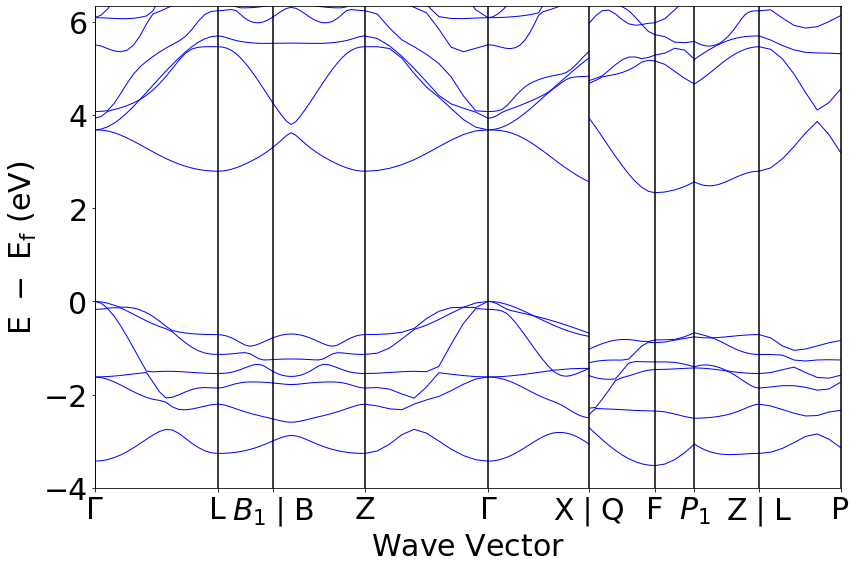

In [29]:
from pymatgen.ext.matproj import MPRester
from matplotlib import pyplot as plt
import numpy as np
api_key = "JmzD7RNxhb8WTdxuZdy"
mat_id = "mp-3613"
from pymatgen.electronic_structure.plotter import BSPlotter
with MPRester(api_key) as m:
    bs = m.get_bandstructure_by_material_id(mat_id)
    
print('Graphe des bandes électriques : ')
p = BSPlotter(bs)
p.get_plot()


In [74]:
print('Informations sur la bande interdite : ')

bg = bs.get_band_gap()
print(bg)
print('\n')
print("")
print('La largeur de notre bande interdite est de ' ,bg['energy'] , ' eV')
print('Le matériau est donc un isolant car ' , bg['energy'] ,' > 1eV')


Informations sur la bande interdite : 
{'direct': False, 'energy': 2.3333, 'transition': '\\Gamma-F'}



La largeur de notre bande interdite est de  2.3333  eV
Le matériau est donc un isolant car  2.3333  > 1eV


In [31]:
#Détermination des points de maximum et minimum de dispersion pour la cbm et vbm

data = p.bs_plot_data()
#print(data)

ener = data.get('energy')
d = data.get('ticks').get('distance')


#déterminer quelles bandes utiliser (cbm et vbm) 

for i in range(0,len(ener[0].get('1'))):
    if ener[0].get('1')[i][0]>2.0:
        cbm=i
        break
vbm = cbm-1
print('bande de maximum de valence : ', vbm)
print('bande de minimum de conduction : ', cbm)
print('\n')

print("On va déterminer les max/min de dispersion avec les variations d'énergie en fonction de la distance.")
print("On va donc calculer les pentes dans chaque zone délimitée par les lignes mitoyennes.")
print('\n')

index_utiles = np.array([0,1,3,4,6,8,9,11,13,14]) #pour ne pas prendre les distances nulles

#calcul des intervalles de distance (DeltaX)
distances = np.zeros(len(index_utiles)-1)
d_limites = np.zeros(len(index_utiles))
d_limites[0] = d[0]
for i in range(0,len(index_utiles)-1):
    distances[i] = d[index_utiles[i+1]] - d[index_utiles[i]]
    d_limites[i+1] = d[index_utiles[i]]


#calcul des intervalles d'énergie (DeltaY)
Delta_E_cond = np.zeros(len(index_utiles)-1)
Delta_E_val = np.zeros(len(index_utiles)-1)

for i in range(0,len(index_utiles)-1):
    Delta_E_cond[i] = ener[i].get('1')[cbm][-1] - ener[i].get('1')[cbm][0] #derniere valeur - premiere valeur
for i in range(0,len(index_utiles)-1):
    Delta_E_val[i] =  ener[i].get('1')[vbm][-1] - ener[i].get('1')[vbm][0] #derniere valeur - premiere valeur
    

#calcul des pentes (DeltaY/DeltaX)
pentes_c = np.zeros(len(index_utiles)-1)
pentes_v = np.zeros(len(index_utiles)-1)


for i in range(0,len(index_utiles)-1):
    pentes_c[i] = Delta_E_cond[i]/distances[i]
    pentes_v[i] = Delta_E_val[i]/distances[i]

cond_max = np.amax(np.abs(pentes_c))
cond_min = np.amin(np.abs(pentes_c))
val_max = np.amax(np.abs(pentes_v))
val_min = np.amin(np.abs(pentes_v))


print('Le maximum de dispersion dans la bande de conduction minimale est : ', cond_max,'.')
print('Il survient dans la direction X|Q - F')
print('Le minimum de dispersion dans la bande de conduction minimale est : ', cond_min)
print('Il survient dans la direction P1 - Z')
print('\n')
print('Le maximum de dispersion dans la bande de valence maximale est : ', val_max,'.')
print('Il survient dans la direction \u0393-X|Q')
print('Le minimum de dispersion dans la bande de valence maximale est : ', val_min)
print('Il survient dans la direction P1 - Z|L')
print('\n')



bande de maximum de valence :  13
bande de minimum de conduction :  14


On va déterminer les max/min de dispersion avec les variations d'énergie en fonction de la distance.
On va donc calculer les pentes dans chaque zone délimitée par les lignes mitoyennes.


Le maximum de dispersion dans la bande de conduction minimale est :  3.2100860160703046 .
Il survient dans la direction X|Q - F
Le minimum de dispersion dans la bande de conduction minimale est :  0.47156959027436923
Il survient dans la direction P1 - Z


Le maximum de dispersion dans la bande de valence maximale est :  0.8907892229624197 .
Il survient dans la direction Γ-X
Le minimum de dispersion dans la bande de valence maximale est :  0.08159421791824528
Il survient dans la direction P1 - Z|L




Illustration des maximum/minimum de dispersion dans la vbm et cbm :


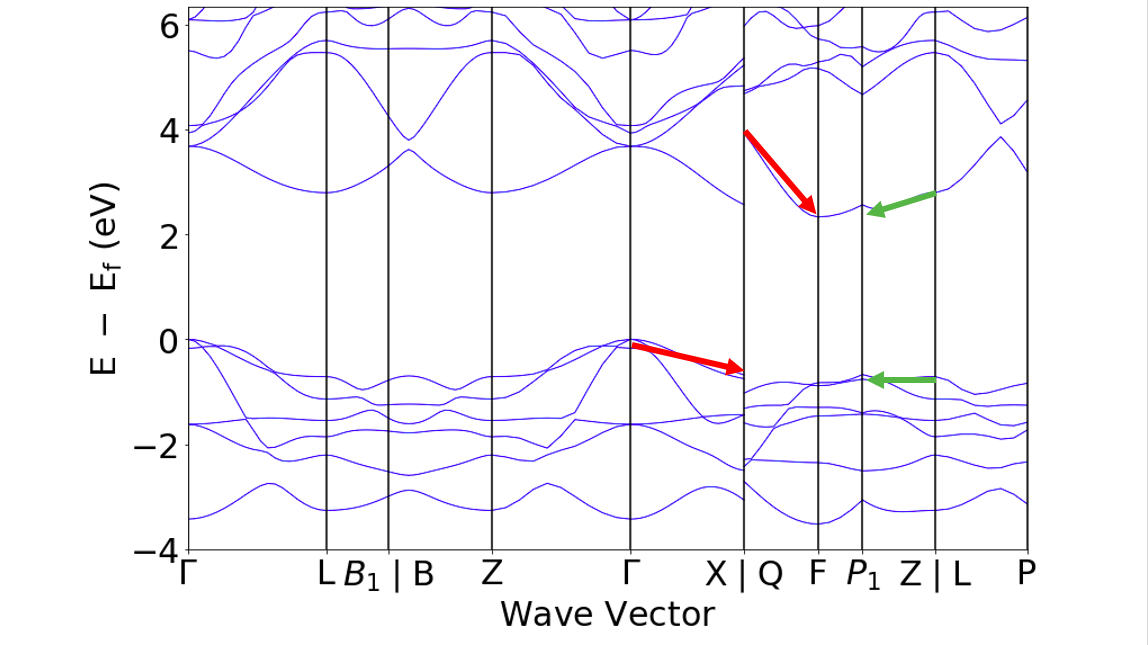

In [38]:
from IPython.display import Image
print("Illustration des maximum/minimum de dispersion dans la vbm et cbm :")
Image("fleches.png")

Pour illustrer le calcul de la masse effective du sommet/masse des vbm et cbm on génère un graphe des deux bandes considérées.
Aux environs des points considérés (sommet et base), les graphes de dispersion sont approximés par des paraboles.
Les expressions analytiques de ces paraboles sont calculées à partir de deux points



Bande de valence maximale : 


On calcule l'expression analytique de la parabole à partir du sommet de la bande et d'un point situé un peu à côté
Les deux points qu'on utilise pour calculer la parabole : 
      1er point : (x_p1, y_p1) = ( 2.976074413432942 , 0.0 )
      2eme point : (x_p2, y_p2) = ( 3.0108035688021038 , -0.0040000000000000036 )


On a comme équation de parabole : f(x) =  -3.31643545171809 *(x -  2.976074413432942 )^2


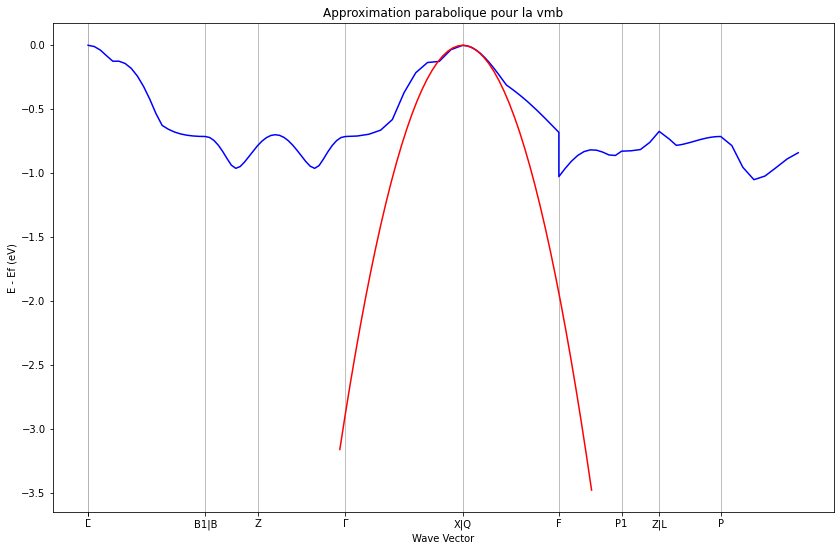

In [79]:
#paramètres pour la question sur les masses effectives
eV = 1.6021765*10**(-19)
A = 10**(-10)
h_bar = 1.0545718*10**(-34)


print('Pour illustrer le calcul de la masse effective du sommet/masse des vbm et cbm on génère un graphe des deux bandes considérées.')
print('Aux environs des points considérés (sommet et base), les graphes de dispersion sont approximés par des paraboles.')
print('Les expressions analytiques de ces paraboles sont calculées à partir de deux points')
print('\n')
print("===============================================================")
print("")
#construire les vecteurs qui permettent de tracer ces graphes
print('Bande de valence maximale : ')
print('\n')
print("On calcule l'expression analytique de la parabole à partir du sommet de la bande et d'un point situé un peu à côté")

#le vecteur x pour tracer la cbm et vbm
x=np.asarray(data.get('distances')[0])
for i in range(1,len(data.get('distances'))):
    x=np.append(x,np.asarray(data.get('distances')[i]))
    
#le vecteur y de la vbm
y_vbm=np.asarray(ener[0].get('1')[vbm])
for i in range(1, len(index_utiles)-1):
    y_vbm = np.append(y_vbm, np.asarray(ener[i].get('1')[vbm]))

#déterminer l'expression de la parabole
i_max = np.where(y_vbm==np.amax(y_vbm))[0][1]
#point 1 (le maximum)
x_p1 = x[i_max]
y_p1 = y_vbm[i_max]
#point 2 (juste un peu après)
x_p2 = x[i_max +2]
y_p2 = y_vbm[i_max+2]
print("Les deux points qu'on utilise pour calculer la parabole : ")
print("      1er point : (x_p1, y_p1) = (",x_p1,",",y_p1,")")
print("      2eme point : (x_p2, y_p2) = (",x_p2,",",y_p2,")")
print('\n')

a = y_p2/(x_p2-x_p1)**2
print('On a comme équation de parabole : f(x) = ',a,'*(x - ',x_p1,')^2')

x_para = np.linspace(2.0,4.0) #vecteur autour de x_p1 et x_p2
y_para = a*(x_para - x_p1)**2

#on graphe tout le bazar fréro
fig, ax = plt.subplots(1,1,figsize=(14,9))
plt.plot(x, y_vbm, "b-")
plt.plot(x_para,y_para,'r-')
labels = ['\u0393', 'L', 'B1|B', 'Z', '\u0393', 'X|Q', 'F', 'P1', 'Z|L', 'P']
ax.set_xticks(d_limites)
ax.set_xticklabels(labels)
ax.set_ylabel('E - Ef (eV)')
ax.set_xlabel('Wave Vector') 
ax.set_title('Approximation parabolique pour la vmb')
axes = plt.gca()
axes.xaxis.grid()
plt.show()




In [73]:
print("On peut maintenant calculer la masse effective du sommet de la dernière bande de valence avec la dérivée")
print("seconde de l'approximation parabolique ramenée aux bonnes unités et différents paramètres : ")
deriv = (2*a)*(A**2)*eV
m1 = (h_bar**2)/deriv
print("La masse effective du sommet de la vbm est : m = ", m1, '[kg]' )
print('\n')


On peut maintenant calculer la masse effective du sommet de la dernière bande de valence avec la dérivée
seconde de l'approximation parabolique ramenée aux bonnes unités et différents paramètres : 
La masse effective du sommet de la vbm est  -1.0465028262547577e-30 [kg]






Bande de conduction minimale : 


On calcule l'expression analytique de la parabole à partir de la base de la bande (minimum) et d'un point situé un peu à côté
Les deux points qu'on utilise pour calculer la parabole : 
      1er point : (x_p1, y_p1) = ( 4.2389188207315005 , 2.3333 )
      2eme point : (x_p2, y_p2) = ( 4.139158247708609 , 2.4480999999999997 )


On a comme équation de parabole : f(x) =  11.535170494353123 *(x -  4.2389188207315005 )^2 +  2.3333


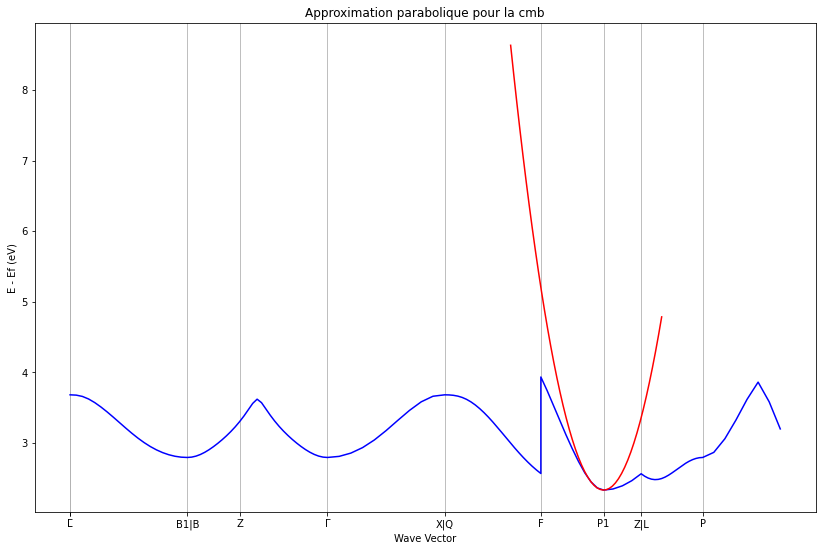

In [80]:
print('==========================================')
print('\n')
print('Bande de conduction minimale : ')
print('\n')
print("On calcule l'expression analytique de la parabole à partir de la base de la bande (minimum) et d'un point situé un peu à côté")

#le vecteur y de la cbm
y_cbm=np.asarray(ener[0].get('1')[cbm])
for i in range(1, len(index_utiles)-1):
    y_cbm = np.append(y_cbm, np.asarray(ener[i].get('1')[cbm]))

#déterminer l'expression de la parabole
i_min = np.where(y_cbm==np.amin(y_cbm))[0][0]
#point 1 (le minimum)
x_p1 = x[i_min]
y_p1 = y_cbm[i_min]
#point 2 (juste un peu après)
x_p2 = x[i_min -2]
y_p2 = y_cbm[i_min-2]
print("Les deux points qu'on utilise pour calculer la parabole : ")
print("      1er point : (x_p1, y_p1) = (",x_p1,",",y_p1,")")
print("      2eme point : (x_p2, y_p2) = (",x_p2,",",y_p2,")")
print('\n')

a2 = (y_p2-y_p1)/(x_p2-x_p1)**2
print('On a comme équation de parabole : f(x) = ',a2,'*(x - ',x_p1,')^2 + ',y_p1)

x_para = np.linspace(3.5,4.7) #vecteur autour de x_p1 et x_p2
y_para = a2*(x_para - x_p1)**2 + y_p1


#on graphe tout le bazar fréro
fig, ax = plt.subplots(1,1,figsize=(14,9))
plt.plot(x, y_cbm, "b-")
plt.plot(x_para,y_para,'r-')
labels = ['\u0393', 'L', 'B1|B', 'Z', '\u0393', 'X|Q', 'F', 'P1', 'Z|L', 'P']
ax.set_xticks(d_limites)
ax.set_xticklabels(labels)
ax.set_ylabel('E - Ef (eV)')
ax.set_xlabel('Wave Vector') 
ax.set_title('Approximation parabolique pour la cmb')
axes = plt.gca()
axes.xaxis.grid()
plt.show()


In [78]:
print("On peut maintenant calculer la masse effective de la base de première bande de conduction")
print("De la même manière")
deriv = (2*a2)*(A**2)*eV
m2 = (h_bar**2)/deriv
print("La masse effective de la base de la cbm est : m = ", m2, '[kg]' )
print('\n')


On peut maintenant calculer la masse effective de la base de première bande de conduction
De la même manière
La masse effective de la base de la cbm est : m =  3.0087627010051275e-31 [kg]


